# Pyhton for Data Science Guide

In this guide we assume that you already have basic knowledge in Python 3.5 or later and uses Jupyter notebook 5.0 or later. We suggest you use Anaconda distribution for Pyhton and create a separate environment for this tutorial's purpose. 

We will be introducing you to the following Python libraries:
 - NumPy
 - matplotlib
 - Pandas

Lets go through each of these libraries and try to have a better picture about them.

## NumPy
Numerical Python (NumPy) was originally written by Travis Oliphant to be the foundation of a scientific computing environment in Python. It branched off from the much wider SciPy module in early 2005 and had its first stable release in mid-2006. Since then, it has enjoyed growing popularity among Pythonists who work in the mathematics, science, and engineering fields.

In [1]:
# Lets import numpy
import numpy as np
print ('numpy version:', np.__version__)
NL = '\n'

numpy version: 1.11.3


The following is a brief summary of what the module contains, most of which we shall explore in this guide
 - numpy.core:                    Basic objects
 - lib:                           Additional utilities
 - linalg:                        Basic linear algebra
 - fft:                           Discrete Fourier transforms
 - random:                        Random number generators
 - distutils:                     Enhanced build and distribution
 - testing:                       Unit testing
 - f2py:                          Automatic wrapping of the Fortran code

### Array Object
A list or dictionary comprehension is relative to an array and sometimes used similarly to an array, there is a huge difference between a list/dictionary and an array in terms of performance and manipulation. numpy.ndarray is a basic array object in NumPy.

In [2]:
# Define ndarray x
x = np.array([[1,2,3],[2,3,4]]) 
print(x)

[[1 2 3]
 [2 3 4]]


NumPy shares the names of its functions with functions in other modules, such as the math module in the Python standard library. Using imports like the following there is not recommended:
```python
from numpy import * 
```
As it may overwrite many functions that are already in the global namespace, which is not recommended. This may lead to unexpected behavior from your code and may introduce very subtle bugs in it . Therefore, it is important and recommended to always follow the import numPy with explicit name such as np convention used in the first line: 
```python
import numpy as np
```
which is the standard convention used for the purpose of importing, as it helps the a developer figure out where a function comes from. 

### Array Dimension
The simplest way of calculating the dimensionality of an array is by checking the ndim attribute of the array.

In [3]:
print(x.ndim)

2


This can also be accomplished in a different (and indirect) way-by checking the shape attribute of the array. 
The dimensionality of the array will be equal to how many numbers you see in the shape attribute.

In [4]:
print(x.shape)

(2, 3)


### Array Indexing and Slicing
NumPy provides powerful indexing capabilities for arrays. Indexing capabilities in NumPy became so popular that many of them were added back to Python.

In [5]:
a = np.round(np.random.random((100, 100))*100)

Simple integer indexing works by typing indices within a pair of square brackets and placing this next to the array variable.

In [6]:
b = a[25, 75]
print(b)

19.0


Like lists and other Python sequences, the use of a colon to index a range of values is also supported. 

In [7]:
print(a[50,:])

[  39.   21.   57.    3.   36.   20.   92.   64.   49.    1.   61.   25.
   16.   89.   96.   25.   91.   86.    1.   25.   92.   65.   57.   46.
   58.   88.    3.   43.   45.   60.    6.   70.   87.   20.   87.   11.
   65.   38.   11.   41.    1.   26.   61.   54.   72.   56.   96.   26.
  100.   54.   22.   41.   29.   79.   23.   34.   59.   79.   91.   15.
   50.   61.   84.   59.   79.   86.   21.   25.   50.   95.   85.   90.
    6.   76.   25.   73.    7.   45.   44.   37.   71.   46.   86.   81.
   32.   29.   57.   23.   59.    6.   27.   12.   69.   15.   42.   24.
   49.   82.   15.   50.]


The indexed portion of an array is also called a slice of an array, which creates a copy of a part or the whole array

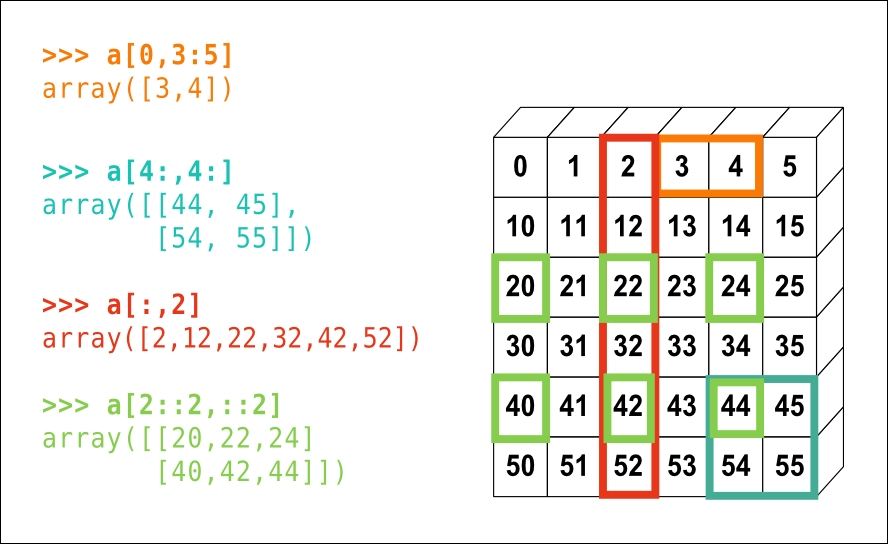

In [8]:
from IPython.display import Image
Image("img/Array Indexing.jpg")

### Array Memmory Layout
A particularly interesting attribute of the ndarray object is flags.

In [9]:
print(x.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


The flags attribute holds information about the memory layout of the array. The C_CONTIGUOUS field in the output indicates whether the array was a C-style array. This means that the indexing of this array is done like a C array. This is also called row-major indexing in the case of 2D arrays. This means that, when moving through the array, the row index is incremented first, and then the column index is incremented. In the case of a multidimensional C-style array, the last dimension is incremented first, followed by the last but one, and so on.

Similarly, the F_CONTIGUOUS attribute indicates whether the array is a Fortran-style array. Such an array is said to have column-major indexing (R, Julia, and MATLAB use column-major arrays). This means that, when moving through the array, the first index (along the column) is incremented first.

Knowing the difference between indexing styles is important, especially for large arrays, because operations on arrays can be significantly sped up if the indexing is applied in the right way. Let's demonstrate this with an exercise.

In [10]:
c_array = np.random.rand(10000, 10000) 
f_array = np.asfortranarray(c_array) 

You can check whether c_array and f_array are indeed C and Fortran-styled, respectively, by reading their flags attributes. 

In [11]:
def sum_row(x):
        '''
        Given an array `x`, return the sum of its zeroth row.
        '''
        return np.sum(x[0, :])
def sum_col(x):
        '''
        Given an array `x`, return the sum of its zeroth column.
        '''
        return np.sum(x[:, 0])

Now, let's test the performance of the two functions on both the arrays using IPython's %timeit magic function:

In [12]:
%timeit sum_row(c_array) 

The slowest run took 14.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.3 µs per loop


In [13]:
%timeit sum_row(f_array) 

The slowest run took 19.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 165 µs per loop


In [14]:
%timeit sum_col(c_array) 

The slowest run took 21.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 155 µs per loop


In [15]:
%timeit sum_col(f_array)

The slowest run took 12.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.5 µs per loop


As we can see, summing up the row of a C array is much faster than summing up its column. This is because, in a C array, elements in a row are laid out in successive memory locations. The opposite is true for a Fortran array, where the elements of a column are laid out in consecutive memory locations.

This is an important distinction and allows you to suitably arrange your data in an array, depending on the kind of algorithm or operation you are performing. Knowing this distinction can help you speed up your code by orders of magnitude.

### Views and Copies
There are primarily two ways of accessing data by slicing and indexing. They are called copies and views: you can either access elements directly from an array, or create a copy of the array that contains only the accessed elements. Since a view is a reference of the original array (in Python, all variables are references), modifying a view modifies the original array too. This is not true for copies.

In [16]:
print("x = ", NL, x, NL)

y = x[0: 2, 1: 3]
print("y = ", NL, y, NL)

y[0,0] = 0
print("y = ", NL, y, NL)
print("x = ", NL, x, NL)

x =  
 [[1 2 3]
 [2 3 4]] 

y =  
 [[2 3]
 [3 4]] 

y =  
 [[0 3]
 [3 4]] 

x =  
 [[1 0 3]
 [2 3 4]] 



In [17]:
print("x = ", NL, x, NL)

z = np.empty([2,2], dtype = int)
z[:] = x[0: 2, 1: 3]
print("z = ", NL, z, NL)

z[0,0] = 2
print("z = ", NL, z, NL)
print("x = ", NL, x, NL)

x =  
 [[1 0 3]
 [2 3 4]] 

z =  
 [[0 3]
 [3 4]] 

z =  
 [[2 3]
 [3 4]] 

x =  
 [[1 0 3]
 [2 3 4]] 



### Cearting Array from lists
The simplest way to create an array is using the array function. When creating an array from lists or tuples, the input may consist of different (heterogeneous) data types. The array function, however, will normally cast all input elements into the most suitable data type required for the array. 

In [18]:
x = range(5)
y = np.array(x)
print(y)

[0 1 2 3 4]


NumPy has a convenient function, called arange, that combines the functionality of the range and array functions.

In [19]:
z = np.arange(5) 
print(z)

[0 1 2 3 4]


For multidimensional arrays, the input lists simply have to be nested, as follows:

In [20]:
x = np.array([[1, 2, 3],[4, 5, 6]]) 
print(x.ndim, x.shape)

2 (2, 3)


### Creating random arrays
The random module in NumPy provides various functions to create random arrays of any data type. We will be using this module very frequently throughout the book to demonstrate the working of functions in NumPy. The random module broadly consists of functions that:
 - Create random arrays
 - Create random permutations of arrays
 - Generate arrays with specific probability distributions

In [21]:
x = np.random.rand(2, 2, 2) 
shape_tuple = (2, 3, 4) 
y = np.random.random(shape_tuple) 
print(x.shape, y.shape) 

(2, 2, 2) (2, 3, 4)


The random function accepts a tuple as an argument and creates an array with dimensionality equal to the length of the tuple. The respective dimensions have their lengths equal to the elements of the tuple. The rand function, on the other hand, takes any number of integer arguments and returns a random array such that its dimensionality is equal to the number of integer arguments passed to the function, and the respective dimensions have lengths equal to the values of the integer arguments. 

Casting the output of rand or random to integers will always return an array of zeros since both these functions return floats within the interval (0,1). The problem can be solved using the randint function, as follows:

In [22]:
LOW, HIGH = 1, 11 
SIZE = 10
x = np.random.randint(LOW, HIGH, size=SIZE)
print(x) 

[10 10 10  8 10  7  9  1  9  3]


There are a few other array creation functions, such as zeros(), ones(), eye(), and others that can be used to create NumPy arrays. 

### Array data types
Data types are another important intrinsic aspect of a NumPy array alongside its memory layout and indexing. The data type of a NumPy array can be found by simply checking the dtype attribute of the array. 



In [23]:
x = np.random.random((10,10)) 
print(x.dtype)
x = np.array(range(10))
print(x.dtype)
x = np.array(['hello', 'world']) 
print(x.dtype)

float64
int32
<U5


Many array creation functions provide a default array data type. For example, the np.zeros and np.ones functions create arrays that are full of floats by default. But it is possible to make them create arrays of other data types too.

In [24]:
x = np.ones((10, 10), dtype=np.int) 
print(x.dtype)
x = np.zeros((10, 10), dtype='|S1')
print(x.dtype)

int32
|S1


### Vectorized operations
All NumPy operations are vectorized, where you apply operations to the whole array instead of on each element individually. This is not just neat and handy but also improves the performance of computation compared to using loops.

In [25]:
x = np.array([1, 2, 3, 4])
print(x+1)
print(x*3)

[2 3 4 5]
[ 3  6  9 12]


In [26]:
y = np.array([-1, 2, 3, 0])
print(x*y)

[-1  4  9  0]


Two NumPy Arrays are multiplied element by element. The first element in array x is multiplied by the first element in array y and so on. One important point to note here is that the arithmetic operations between two NumPy Arrays are not matrix multiplications. The result still returns the same shape of NumPy Arrays. A matrix multiplication in NumPy will use numpy.dot().

In [27]:
print(np.dot(x,y))

12


NumPy also supports logic comparison between two arrays, and the comparison is vectorized as well. The result returns a Boolean, and NumPy Array indicates which element in both arrays is equal. If two different shapes of arrays are compared, the result would only return one False, which indicates that the two arrays are different, and would not really compare each element:

In [28]:
print(x==y)

[False  True  True False]


We will use the %timeit function in IPython, which was introduced in the last chapter, to show you the difference between NumPy operations and the Python for loop:

In [29]:
x = np.arange(10000) 
%timeit x + 1 
y = range(10000)
%timeit [i + 1 for i in y]

The slowest run took 7.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.38 µs per loop
1000 loops, best of 3: 705 µs per loop


### Universal functions (ufuncs)
NumPy has many universal functions (so-called ufuncs), so use them to your advantage to eliminate as many loops as you can to optimize your code. 

In [30]:
x = np.arange(5,10)
print(np.square(x))

[25 36 49 64 81]


Math operations are widely supported in ufuncs, some that are as basic as numpy.square() or numpy.log(), and others that are advanced trigonometric operations, such as numpy.arcsin(), numpy.rad2deg(), and more. Here, np.mod()retrieves the remainders of division.

In [31]:
y = np.ones(5) * 10
print(np.mod(y, x))

[ 0.  4.  3.  2.  1.]


Some ufuncs have similar names, but their function and behaviors are very different. Here is an example of numpy.minimum() and numpy.min().

In [32]:
print(np.minimum(x, 7))
print(np.min(x))

[5 6 7 7 7]
5


Most ufuncs have an optional argument to provide more flexibility when using them

In [33]:
print(x)
z = np.repeat(x, 3).reshape(5, 3) 
print(z)

[5 6 7 8 9]
[[5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]


In [34]:
print(np.median(z))
print(np.median(z, axis = 0))
print(np.median(z, axis = 1))

7.0
[ 7.  7.  7.]
[ 5.  6.  7.  8.  9.]


Ufuncs not only provide optional arguments to tune operations, but many of them also have some built-in methods, which provides even more flexibility. 

In [35]:
print(np.add.accumulate(x), NL)
print(np.multiply.outer(x, x))

[ 5 11 18 26 35] 

[[25 30 35 40 45]
 [30 36 42 48 54]
 [35 42 49 56 63]
 [40 48 56 64 72]
 [45 54 63 72 81]]


### Broadcasting rules
NumPy provides the flexibility to broadcast a smaller-sized array across a larger one. The general rule for broadcasting is to determine whether two arrays are compatible with dimensioning. 

In [36]:
x = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20]]) 
y = np.array([1, 2, 3])
print(x+y)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]


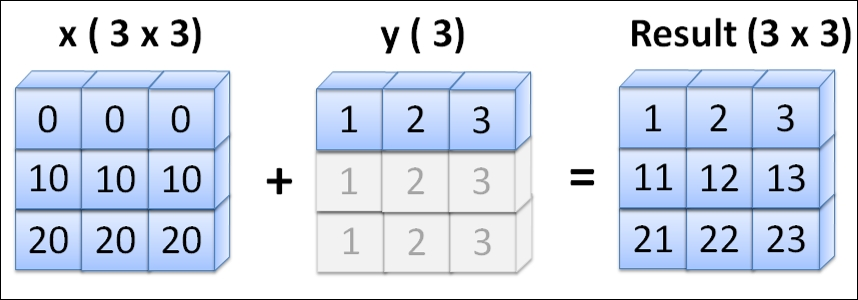

In [37]:
Image("img/Broadcasting_001.jpg")

In [38]:
x = np.array([[0], [10], [20]])
y = np.array([1, 2, 3])
print(x+y)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]


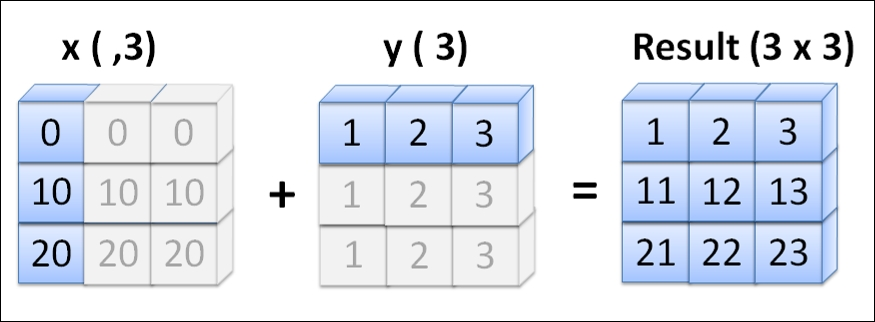

In [39]:
Image("img/Broadcasting_002.jpg")

In [40]:
x = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20]]) 
y = np.arange(1,5)
print(x+y)

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

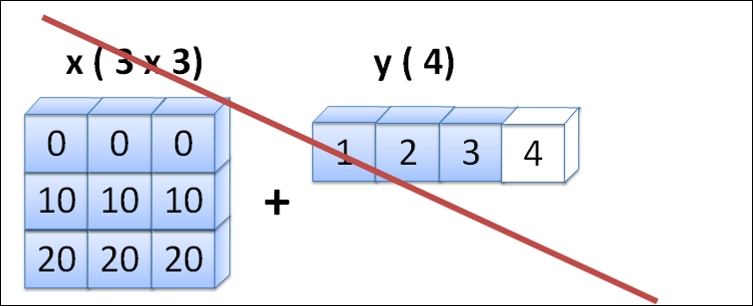

In [41]:
Image("img/Broadcasting_003.jpg")

### Reshaping arrrays
It's common for you to create a NumPy Array in just one dimension, reshaping it to a multidimension later, or vice versa.

A key idea here is that you can change the shape of your arrays, but the number of elements should not be changed; for example, you can't reshape a 3 by 3 array to a 10 by 1 array.

In [42]:
x = np.arange(24)
x.shape = 2, 3, -1
print(x, NL)
print(x.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 

(2, 3, 4)


In [43]:
x = np.arange(1000000)
x.shape = 100, 100, 100
%timeit x.flatten()
%timeit x.ravel()

1000 loops, best of 3: 1.45 ms per loop
The slowest run took 15.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 305 ns per loop


The difference in performance between the two functions is that np.flatten() creates a copy from the original array, while np.ravel() just changes the view. The two functions collapse the array. 

### Vector stacking
Through vector stacking we construct a two or multidimensional array by equally-sized row vectors.

In [44]:
x = np.arange (0, 10, 2)
y = np.arange (0, -5, -1)
print(np.vstack([x, y]))
print(np.vstack([x, y]).shape)

[[ 0  2  4  6  8]
 [ 0 -1 -2 -3 -4]]
(2, 5)


Numpy.vstack() constructs the new array by vertically stacking two input arrays. The new array is two-dimensional.

In [45]:
print(np.hstack([x, y]))
print(np.hstack([x, y]).shape)

[ 0  2  4  6  8  0 -1 -2 -3 -4]
(10,)


While numpy.hstack() combines the two arrays horizontally, the new array is still one-dimensional

In [46]:
print(np.dstack([x, y]))
print(np.dstack([x, y]).shape)

[[[ 0  0]
  [ 2 -1]
  [ 4 -2]
  [ 6 -3]
  [ 8 -4]]]
(1, 5, 2)


numpy.dstack() is a bit different: it stacks the arrays in sequence depth-wise along the third dimension so that the new array is three-dimensional.

### A Boolean Mask
Indexing and slicing are quite handy and powerful in NumPy, but with the booling mask it gets even better! 

In [47]:
x = np.array([1,3,-1, 5, 7, -1])
mask = (x < 0)
print(mask)

[False False  True False False  True]


In [48]:
x [mask] = 0
print(x)

[1 3 0 5 7 0]


The following example shows how to sum up the mask array, where True stands for one and False stands for 0.

In [49]:
x = np.random.random(50)
(x > .5).sum()

21

### Introducing strides
Strides are the indexing scheme in NumPy arrays, and indicate the number of bytes to jump to find the next element.

In [50]:
x = np.arange(8, dtype = np.int8)
print(x)
print(x.strides)
print(x.data)

[0 1 2 3 4 5 6 7]
(1,)


In [51]:
x.shape = 2, 4
print(x.strides)

(4, 1)


In [52]:
x.shape = 1,4,2
print(x.strides)

(8, 2, 1)


Now we change the dimensions of x to 2 by 4 and check the strides again. We can see it changes to (4, 1), which means the elements in the first dimension are four bytes apart, and the array need to jump four bytes to find the next row, but the elements in the second dimension are still 1 byte apart, jumping one byte to find the next column. The same behavior occurs when we change the shape to be three dimensional: 1 by 4 by 2 arrays.

In [53]:
x = np.ones((10000,))
y = np.ones((10000 * 100, ))[::100]
print(x.shape, y.shape)
print((x==y).sum())

(10000,) (10000,)
10000


We create two NumPy Arrays, x and y, and do a comparison; we can see that the two arrays are equal. They have the same shape and all the elements are one, but actually the two arrays are different in terms of memory layout.

In [54]:
print(x.flags, NL)
print(y.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False 

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


We can see that the x array is continuous in both the C and Fortran order while y is not. Let's check the strides for the difference

In [55]:
print(x.strides, y.strides)

(8,) (800,)


Array x is created continuously, so in the same dimension each element is eight bytes apart (the default dtype of numpy.ones is a 64-bit float); however, y is created from a subset of 10000 * 100 for every 100 elements, so the index schema in the memory layout is not continuous.

Even though x and y have the same shape, each element in y is 800 bytes apart from each other. When you use NumPy arrays x and y, you might not notice the difference in indexing, but the memory layout does affect the performance. Let's use the %timeit function 

In [56]:
%timeit x.sum() 
%timeit y.sum() 

The slowest run took 7.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.43 µs per loop
The slowest run took 4.92 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 29.2 µs per loop


Array x with smaller strides is faster than the larger strides of y. The reason for the difference in performance is that the CPU is pulling data from the main memory to its cache in blocks, and the smaller stride means fewer transfers are needed. See the following graph for details, where the red line represents the size of the CPU cache, and blue boxes represent the memory layout containing the data.

It's obvious that if x and y are both required, 100 blue boxes of data, the required cache time for x will be less.

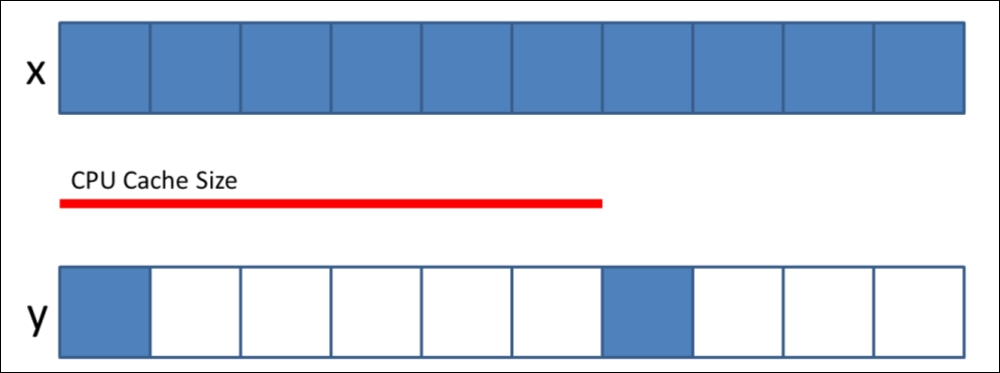

In [57]:
Image("img/Array Strides.jpg")

### Structured arrays
Structured arrays or record arrays are useful when you perform computations, and at the same time you could keep closely related data together. However, one principle in NumPy that still needs to be honored is that the data type in each field  needs to be homogeneous.

In [58]:
x = np.empty((2,), dtype = ('i4,f4,a15'))
x[:] = [(1,0.5, 'BrainScript'), (10,-0.5, 'Analytica')]
print(x)
print(x.dtype)

[(1, 0.5, b'BrainScript') (10, -0.5, b'Analytica')]
[('f0', '<i4'), ('f1', '<f4'), ('f2', 'S15')]


You can see the print-out of x, which now contains three different types of records, and we also get a default field name in dtype:f0, f1, and f2. One thing to note here is that we used the print-out data type-there is a < in front of i4 and f4, and < stands for byteorder big-endian. 

In [59]:
print(x[0], NL)
print(x['f2'])

(1, 0.5, b'BrainScript') 

[b'BrainScript' b'Analytica']


The way we retrieve data remains the same, we use the index to obtain the record, but moreover, we can use the field name to obtain the value of certain fields, so in the previous example, we used f2 to obtain the string field. In the following example, we are going to create a view of x, named y, and see how it interacts with the original record array.

In [60]:
y = x['f0']
print(y, NL)
y[:] = y * 10 
print(y, NL)
y[:] = y + 0.5 
print(y, NL)
print(x)

[ 1 10] 

[ 10 100] 

[ 10 100] 

[(10, 0.5, b'BrainScript') (100, -0.5, b'Analytica')]


Here, y is the view of field f0 in x. In the record arrays, the characteristics of NumPy arrays still remain. When you multiply the scalar 10, it still applies to whole array of y (the broadcasting rule), and it always honors the data type. You can see after the multiplication, we add 0.5 to y, but since the data type of field f0 is a 32-bit integer, the result is still [10, 100]. Also, y is a view of f0 in x, so they share the same memory block. When we print out x after the calculation in y, we can find that the values in x have also changed.

Here are many forms of string argument NumPy can accept. The most preferred can be chosen from one of these.


|**Data types**|**Representation**  
|:-------------|:------------------
|b1            |Bytes                                                              
|i1,i2,i4,i8   |Signed integers with 1, 2, 4, and 8 bytes corresponding to them    
|u1,u2,u4,u8   |Unsigned integers with 1, 2, 4, and 8 bytes                        
|f2,f4,f8      |Floats with 2, 4, and 8 bytes                                      
|c8,c16        |Complex with 8 and 16 bytes                                        
|a<n>          |Fixed length strings of length n                                   

You may also prefix the string arguments with a repeated number or a shape to define the dimension of the field, but it's still considered as just one field in the record arrays. Let's try using the shape as prefix to the string arguments in the following example:

In [61]:
z = np.ones((2,), dtype = ('3i4, (2,3)f4')) 
print(z)
print(z.dtype)

[([1, 1, 1], [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])
 ([1, 1, 1], [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])]
[('f0', '<i4', (3,)), ('f1', '<f4', (2, 3))]


You might be wondering whether the default field name can be changed to something meaningful in your analysis? Of course it can! This is how:

In [62]:
print(x.dtype.names, NL)
x.dtype.names = ('id', 'value', 'note')
print(x, NL)
print(x.dtype)

('f0', 'f1', 'f2') 

[(10, 0.5, b'BrainScript') (100, -0.5, b'Analytica')] 

[('id', '<i4'), ('value', '<f4'), ('note', 'S15')]


By assigning the new field names back to the names attribute in the dtype object, we can have our customized field names. Or you can do this when you initialize the record arrays by using a list with a tuple, or a dictionary. In the following examples, we are going to create two identical record arrays with customized field names using a list, and a dictionary:

In [63]:
list_ex = np.zeros((2,), dtype = [('id', 'i4'), ('value', 'f4', (2,))]) 
print(list_ex, NL)
print(list_ex.dtype, NL)
dict_ex = np.zeros((2,), dtype = {'names':['id', 'value'], 'formats':['i4', '2f4']})
print(dict_ex, NL)
print(dict_ex.dtype, NL)

[(0, [0.0, 0.0]) (0, [0.0, 0.0])] 

[('id', '<i4'), ('value', '<f4', (2,))] 

[(0, [0.0, 0.0]) (0, [0.0, 0.0])] 

[('id', '<i4'), ('value', '<f4', (2,))] 



In [64]:
print(x[['id', 'note']])

[(10, b'BrainScript') (100, b'Analytica')]


### Dates and time
Starting from NumPy 1.7, the NumPy core supports date time types. In order to differentiate from the datetime object in Python, the data type is called datetime64.

In [65]:
x = np.datetime64('2016-06-25')
y = np.datetime64('2016-06')
print(x.dtype, y.dtype)

datetime64[D] datetime64[M]


The default date units supported by numpy.datetime64 are years (Y), months (M), weeks (W), and days (D), while the time units are hours (h), minutes (m), seconds (s), and milliseconds (ms).

In [66]:
y = np.datetime64('2016-06', 'D')
print(y, y.dtype, NL)
x = np.arange('2016-01', '2016-04', dtype = 'datetime64[M]')
print(x)

2016-06-01 datetime64[D] 

['2016-01' '2016-02' '2016-03']


In [67]:
y = np.datetime64('2016-01-01')
print(x-y,(x-y).dtype)

[ 0 31 60] timedelta64[D]


Because NumPy doesn't have a physical quantities system in its core, the timedelta64 data type was created to complement datetime64.

In [68]:
print(np.datetime64('2015') + np.timedelta64(12, 'M'))
print(np.timedelta64(1, 'W') / np.timedelta64(1, 'D'))

2016-01
7.0


We are going to convert the existing datetime64 array x to a list of Python datetime in two ways.

In [69]:
print(x.tolist(), NL)
print([element.item() for element in x])

[datetime.date(2016, 1, 1), datetime.date(2016, 2, 1), datetime.date(2016, 3, 1)] 

[datetime.date(2016, 1, 1), datetime.date(2016, 2, 1), datetime.date(2016, 3, 1)]


On the other hand, if you already have a list of Python datetime and want to convert it to NumPy datetime64 arrays, simply use the numpy.array() function.

### File I/O
The sample array we're going to create will contain an id field with consecutive integers, a value field containing random floats, and a date field with numpy.datetime64['D'].

In [70]:
id = np.arange(1000) 
value = np.random.random(1000)
day = np.random.randint(0, 365+1, 1000) * np.timedelta64(1,'D')
date = np.datetime64('2016-01-01') + day
rec_array = np.core.records.fromarrays([id, value, date], names='id, value, date', formats='i4, f4, a10')
print(rec_array[:5])

[(0, 0.5747503042221069, b'2016-06-26')
 (1, 0.2574496269226074, b'2016-12-18')
 (2, 0.45331794023513794, b'2016-09-21')
 (3, 0.38129568099975586, b'2016-06-04')
 (4, 0.42807385325431824, b'2016-04-04')]


In [71]:
np.savetxt('./record.csv', rec_array, fmt='%i,%.4f,%s')

In [72]:
read_array = np.genfromtxt('./record.csv', dtype='i4,f4,a10', delimiter=',', skip_header=0)
print(read_array[:5])
print(read_array.dtype)

[(0, 0.5748000144958496, b"b'2016-06-")
 (1, 0.2574000060558319, b"b'2016-12-")
 (2, 0.45329999923706055, b"b'2016-09-")
 (3, 0.3813000023365021, b"b'2016-06-")
 (4, 0.42809998989105225, b"b'2016-04-")]
[('f0', '<i4'), ('f1', '<f4'), ('f2', 'S10')]


In [73]:
read_array.dtype.names = ('id', 'value', 'date') 
mask = read_array['value'] >= 0.75
from numpy.lib.recfunctions import append_fields
read_array = append_fields(read_array, 'mask', data=mask, dtypes='i1')
print(read_array[:5])
print(read_array.dtype)

[(0, 0.5748000144958496, b"b'2016-06-", 0)
 (1, 0.2574000060558319, b"b'2016-12-", 0)
 (2, 0.45329999923706055, b"b'2016-09-", 0)
 (3, 0.3813000023365021, b"b'2016-06-", 0)
 (4, 0.42809998989105225, b"b'2016-04-", 0)]
[('id', '<i4'), ('value', '<f4'), ('date', 'S10'), ('mask', 'i1')]


numpy.lib.recfunctions can only be accessed when you import it directly, and the append_field() function is in the module. Appending a record array is as simple as appending a NumPy array: the first argument is the base array; the second argument is the new field name mask, and the data associated with it; and the last argument is the data type. 